In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
DATA_PATH = 'names'

In [98]:
def read_files(*args):
    df_list = []
    for year in args:
        year_s = str(year)
        df = pd.read_csv(f"{DATA_PATH}\yob{year_s}.txt", names=['Names', 'Gender', 'Count'])
        df['Year'] = year
        df_list.append(df)
    df_res = pd.concat(df_list)  
    return df_res

In [99]:
def count_consonant(string):
    vowels = ['a','e','i','o','u','y']
    cnt_consonant = 0
    for s in string:
        if s not in vowels:
            cnt_consonant += 1
    return cnt_consonant

In [100]:
name1 = 'Ruth'
name2 = 'Robert'

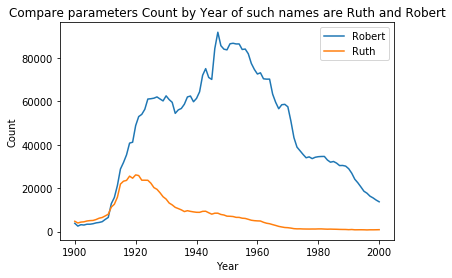

In [103]:
list_src = [x for x in range(1900, 2001)]
df = read_files(*list_src)

df_s = df[(df['Names'] == name1) | (df['Names'] == name2)].groupby(['Names', 'Year']).sum().reset_index()
df1 = df_s[df_s['Names'] == name2]
df2 = df_s[df_s['Names'] == name1]

p1 = plt.plot(df1['Year'], df1['Count'] );
p2 = plt.plot(df2['Year'], df2['Count'] );

plt.title(f"Compare parameters Count by Year of such names are {name1} and {name2}")
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend((p1[0], p2[0]), (name2, name1))

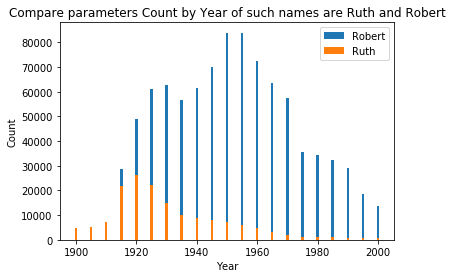

In [95]:
list_src = [x for x in range(1900, 2001, 5)]
df = read_files(*list_src)

df1 = df[df['Names'] == name2].groupby(['Year']).sum()
df2 = df[df['Names'] == name1].groupby(['Year']).sum()

p1 = plt.bar(df1.index, df1['Count']);
p2 = plt.bar(df2.index, df2['Count']);

plt.title(f"Compare parameters Count by Year of such names are {name1} and {name2}")
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend((p1[0], p2[0]), (name2, name1))

Text(0.5, 1.0, 'Compare parameters Count of names started by letter R')

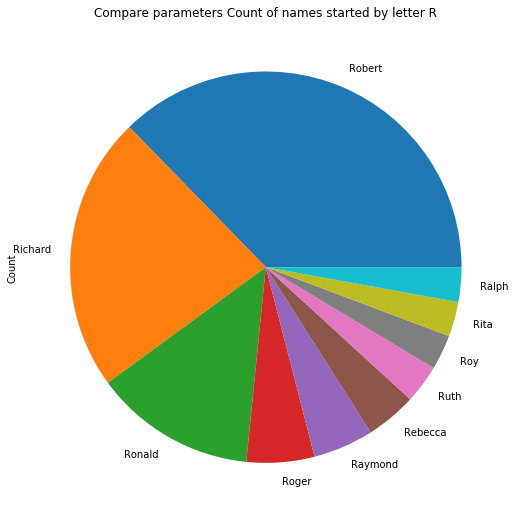

In [106]:
df = read_files(1950)
df_top10 = df[df['Names'].str[0] == 'R'].groupby(['Names']).sum().sort_values(by=['Count'], ascending=False).head(10)
df_top10.plot(kind='pie', y='Count', legend = False, figsize=(9,9))
plt.title(f"Compare parameters Count of names started by letter R")

In [108]:
list_src = [x for x in range(1900, 2001)]
df = read_files(*list_src)
df_group = df[['Names', 'Count']].groupby(['Names']).sum().sort_values(by=['Count'], ascending=False).reset_index()
df_group['Count_consonant'] = df_group['Names'].apply(count_consonant)
df_result = df_group[['Count', 'Count_consonant']].groupby(['Count_consonant']).sum().sort_values(by=['Count_consonant'], ascending=True).reset_index()
df_result

,Count_consonant,Count
0,1,3093676
1,2,37341960
2,3,100345966
3,4,88267928
4,5,40949184
5,6,6559399
6,7,169189
7,8,1786418
8,9,1380
9,10,166


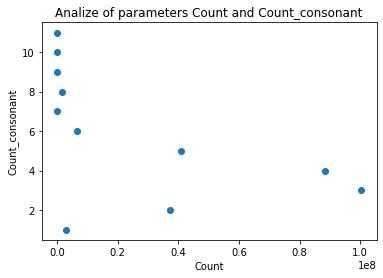

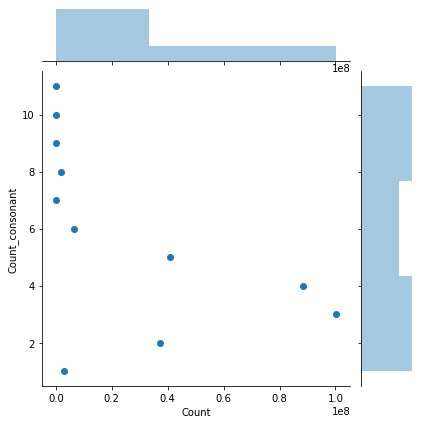

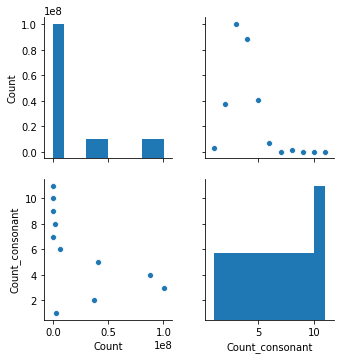

In [116]:
plt.scatter(df_result['Count'], df_result['Count_consonant'])
plt.title(f"Analize of parameters Count and Count_consonant")
plt.xlabel('Count')
plt.ylabel('Count_consonant')

sns.jointplot(x='Count', y='Count_consonant', data=df_result, kind='scatter')
sns.pairplot(df_result[['Count', 'Count_consonant']])